<a href="https://colab.research.google.com/github/hiephamk/Data_Analysis/blob/Khanh-Chi/GroupHCDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis & Visualization - Project Work (Team HCDA)

## Introduction & Objective

We selected dataset from Kaggle: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023 on 15 Nov 2023. The information this dataset was most likely gathered by scraping job postings from ai-jobs.net.

We aim to use this dataset to analyze salaries for various data science roles, factoring in key variables like experience, job specifics and scale of company. This offers insights into potential earnings across different domains that influence data science salaries. For example, we would use it to address the following questions:

1. Which are the top 10 jobs with the highest salary for senior in 2023?
2. What is the mean salary of each job title in small-sized companies in the US?
3. How does the average income for the "Data Scientist" job vary by experience level?
4. What are the top 5 poppular job titles in 2022 and 2023?

For those embarking on the data science journey, these observations enable them for informed decision-making and strategic job hunting, thereby setting realistic salary expectations.

# 1. Data Preprocessing

**Activities:**
- Select a dataset to work on and understand your dataset. Your activities may include tasks such as viewing a random sample of data, getting the total number of rows and columns.
- Check to see if your dataset contains any missing values and get the percentage of the missing data. Within the context of your dataset, decide what to do with the missing values and take necessary steps.
Identify and drop duplicate values from the dataset.
- Separate one of your columns in the dataset that contains continuous numeric data into appropriate bins. You may use cut or qcut function.
- Identify any outliers within your dataset. If the dataset does not include any outlier, you can randomly mess up some portion of your data.
Decide what to do with the outliers.

**Assessment:**
- Understanding the Dataset (1 point): Demonstrates a basic understanding of the selected dataset by performing tasks like viewing a random sample, determining the total number of rows and columns.
- Handling Missing Values (1 point): Identifies and addresses missing values effectively, providing a clear strategy for handling them.
- Handling Duplicates (1 point): Detects and removes duplicate values from the dataset, ensuring data cleanliness.

### Data Exploration

In [ ]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)


In [ ]:
# Load raw data
from google.colab import data_table
url = 'https://raw.githubusercontent.com/hiephamk/Data_Analysis/main/ds_salaries.csv'
salary = pd.read_csv(url,sep = ',')

In [ ]:
# Preview the first 10 lines of the loaded data
salary.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [ ]:
# View a random dataset of data
sample = salary.sample(5)
sample

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1320,2023,MI,FT,Machine Learning Engineer,100000,GBP,121523,GB,0,GB,M
2019,2022,SE,FT,BI Developer,120000,USD,120000,US,100,US,M
1061,2023,SE,FT,Data Manager,120000,USD,120000,US,0,US,M
1931,2022,SE,FT,Applied Scientist,164000,USD,164000,US,100,US,M
1875,2022,SE,FT,Data Engineer,144000,USD,144000,US,100,US,M


Now we need to know how many rows and columns are there in the data set, what variables it has and the data types of the variables.

In [ ]:
# Viewing data type and getting the total number of rows and columns
print(salary.info())
salary.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


(3755, 11)

As we can see from the above data frame information, there are 3755 rows, 11 columns, and no missing values in this dataset since all fields has 3755 non-null entries.

However, we could check again to assure if there are some missing values in the data set.

In [ ]:
# Check missing values
missing_values = salary.isnull().sum()
print(missing_values)

# Calculate the missing percentage
total_values = np.product(salary.shape)
percentage = (missing_values / total_values) * 100
print(percentage)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64


As per the above result, we now can ensure that our data set has no missing value.

### Data Transformation

#### **Unnecessary data drop**

Firstly, out of 3,755 observations in the dataset, there are only over 700 data values from other nations besides the US. Since this data may not be meaningfully contributing to useful analysis, we decide to exclude these data and retain only the data values from the US.

In [ ]:
# Filter data values to keep the US country only
df_salary1 = salary[salary['company_location'] == 'US']
df_salary1.shape

(3040, 11)

Now that we only have one country in the data, we do not need 2 features "company_location" and "employee_residence" because all employees who work for a company based in the US also live in the US. So we will drop them for a cleaner data set.

Besides, the "salary" and "salary_currency" features will also be removed. We saw that there are 3 features relevant to salary: "salary", "salary_currency", and "salary_in_usa". However, we will primarily focus on the "salary_in_usd" feature because it provides a standardized currency for easy comparisons.

In [ ]:
# Drop 2 columns 'company_location' and 'employee_residence'
df_salary2 = df_salary1.drop(columns=['company_location', 'employee_residence'])
df_salary2.shape

(3040, 9)

In [ ]:
# Drop 2 columns: 'salary' and 'salary_currency'
df_salary3 = df_salary2.drop(['salary','salary_currency'], axis=1)
df_salary3.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,MI,CT,ML Engineer,30000,100,S
2,2023,MI,CT,ML Engineer,25500,100,S
5,2023,SE,FT,Applied Scientist,222200,0,L
6,2023,SE,FT,Applied Scientist,136000,0,L
9,2023,SE,FT,Data Scientist,147100,0,M


In [ ]:
# Check the number of rows and columns of the latest dataset
df_salary3.shape

(3040, 7)

As observed, there are limited number of data values for the year 2020, 2021 ( 131 out of 3,040 observations) in the latest data set. These data may not contribute significantly to our analytic, so we will exclude it in the final data set.

In [ ]:
# Filter data without values of years 2020 and 2021
df_salary = df_salary3[(df_salary3['work_year'] != 2020) & (df_salary3['work_year'] != 2021)]
df_salary.shape

(2909, 7)

**Finally**, our data set now has **2909 rows and 7 columns** in total.

#### **Duplicated values**

We are going to identify and remove duplicated values (if any) in order to smooth our data set.

In [ ]:
# Check duplicate values
dup_value = df_salary.duplicated()

# Find the number of duplicate values
dup_value_count = dup_value.value_counts()
dup_value_count

False    1798
True     1111
dtype: int64

The result shows that there are **1111 duplicated entries** in our **final dataset**.

Before dropping them, we will display some of these duplicated values to see if they are valid to assure that we don't make any mistake here.

In [ ]:
# Show some rows of duplicate values to investigate
df_salary[dup_value].head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
115,2023,SE,FT,Data Scientist,150000,0,M
123,2023,SE,FT,Analytics Engineer,289800,0,M
153,2023,MI,FT,Data Engineer,100000,100,M
154,2023,MI,FT,Data Engineer,70000,100,M
160,2023,SE,FT,Data Engineer,115000,0,M
163,2023,SE,FT,Applied Scientist,309400,0,L
164,2023,SE,FT,Applied Scientist,159100,0,L
167,2023,MI,FT,Data Engineer,162500,0,M
168,2023,MI,FT,Data Engineer,130000,0,M
171,2023,SE,FT,Data Engineer,145000,0,M


After manually examining the above duplicated values, we found that ***each of the duplicates had unique values in the "salary_in_usd"*** feature. Hence, we concluded that all of these duplicate entries are invalid observations, and **none of them will be removed**.

#### **Distinct values**

In [ ]:
# We would like to check & view the distinct values in each of columns
unique_counts = df_salary.nunique(axis=0)
unique_values_list = []
for col_name in unique_counts.index:
        values_get = df_salary[col_name].unique()
        unique_values_list.append(values_get)
df_distinct = pd.DataFrame({'Column_name': unique_counts.index, 'Distinct_values_count': unique_counts.values, 'Values_range': unique_values_list})
df_distinct


,Column_name,Distinct_values_count,Values_range
0,work_year,2,"[2023, 2022]"
1,experience_level,4,"[MI, SE, EN, EX]"
2,employment_type,4,"[CT, FT, PT, FL]"
3,job_title,61,"[ML Engineer, Applied Scientist, Data Scientis..."
4,salary_in_usd,645,"[30000, 25500, 222200, 136000, 147100, 90700, ..."
5,remote_ratio,3,"[100, 0, 50]"
6,company_size,3,"[S, L, M]"


#### **Replace values**
According to the above distinct values and source inspection, we can decribe the distinct values of several fields as following:

**1. Experience Level:** 4 unique values
- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level / Expert
- EX: Executive-level / Director

**2. Employee Type:** 4 categories
- PT: Part-time
- FT: Full-time
- CT: Contract
- FL: Freelance

**3. Remote Ratio:** 3 numerical values
- 0: Office work
- 50: Partial remote
- 100: Fully remote

**4. Company Size:** 3 unique values
- S: Small-sized company
- M: Medium-sized company
- L: Large-sized company

Now let's replace these abbreviations with the descriptions for easy understanding.

In [ ]:
# Replace the abbreviations
df_salary['experience_level'] = df_salary['experience_level'].replace(['EN','MI','SE','EX'], ['Entry-level','Mid-level','Senior','Executive'])
df_salary['employment_type'] = df_salary['employment_type'].replace(['FT','PT','CT','FL'], ['Full-time','Part-time','Contract','Freelance'])
df_salary['remote_ratio'] = df_salary['remote_ratio'].replace([0,50,100], ['Office work','Partial remote','Fully remote'])
df_salary['company_size'] = df_salary['company_size'].replace(['S', 'M', 'L'], ['Small', 'Medium', 'Large'])

In [ ]:
# Show 5 first rows of the final data set after replacing
df_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,Mid-level,Contract,ML Engineer,30000,Fully remote,Small
2,2023,Mid-level,Contract,ML Engineer,25500,Fully remote,Small
5,2023,Senior,Full-time,Applied Scientist,222200,Office work,Large
6,2023,Senior,Full-time,Applied Scientist,136000,Office work,Large
9,2023,Senior,Full-time,Data Scientist,147100,Office work,Medium


#### **Discretization & Bining**

We decide using "salary_in_usd" feature to do bining since this column contains numerical values representing the salaries in USD and by grouping these values into discrete categories, it will be useful to have an overview on the salary range.

Before creating the salary bin, we need to know its minimum and maximum amount so that we can determine the first and last value of the bin.

In [ ]:
# Get the minimum salary
min_salary = df_salary['salary_in_usd'].min()
min_salary

12000

In [ ]:
# Get the maximum salary
max_salary = df_salary['salary_in_usd'].max()
max_salary

405000

Then, we start creating the salary bin using cut function.

In [ ]:
# Divide the 'salary_in_usd' column into 5 bins with labels
bins = [12000,50000,100000,150000,200000,410000]
labels = ['12k-50k','50k-100k','100k-150k','150k-200k','200k-410k']
salary_range_bins = pd.cut(df_salary['salary_in_usd'], bins = bins, labels = labels, right = False)
salary_range_bins

1         12k-50k
2         12k-50k
5       200k-410k
6       100k-150k
9       100k-150k
          ...    
3479    100k-150k
3482    100k-150k
3486    100k-150k
3490    100k-150k
3493    100k-150k
Name: salary_in_usd, Length: 2909, dtype: category
Categories (5, object): ['12k-50k' < '50k-100k' < '100k-150k' < '150k-200k' < '200k-410k']

In [ ]:
# Let's count the values of each bin
pd.value_counts(salary_range_bins)

100k-150k    1119
150k-200k     840
200k-410k     545
50k-100k      383
12k-50k        22
Name: salary_in_usd, dtype: int64

#### **Outliers**

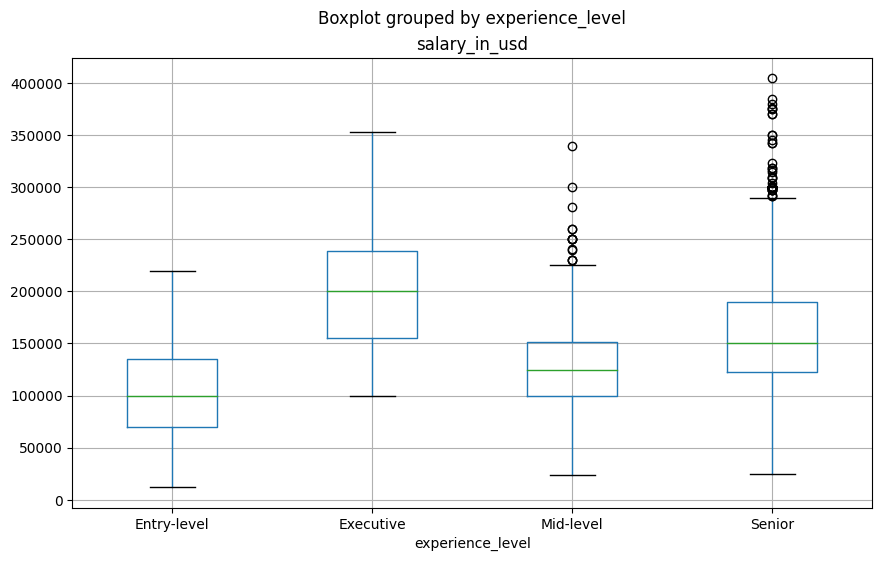

In [ ]:
# Define outliers by using Boxplot
df_salary.boxplot(column='salary_in_usd', by='experience_level', figsize=(10,6))
plt.show()

In [ ]:
# Show the salary of executive level from highest to lowest
exe_level = df_salary[df_salary['experience_level'] == 'Executive']
salary_of_exe = exe_level.sort_values(by='salary_in_usd', ascending=False)
salary_of_exe

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
478,2023,Executive,Full-time,Director of Data Science,353200,Office work,Medium
228,2023,Executive,Full-time,Head of Data,329500,Office work,Medium
3410,2022,Executive,Full-time,Data Engineer,324000,Fully remote,Medium
1396,2023,Executive,Full-time,Head of Data Science,314100,Office work,Medium
1932,2022,Executive,Full-time,Data Engineer,310000,Fully remote,Medium
...,...,...,...,...,...,...,...
3275,2022,Executive,Full-time,Data Analyst,110000,Fully remote,Medium
1375,2023,Executive,Full-time,Data Engineer,110000,Office work,Medium
275,2023,Executive,Full-time,Data Engineer,110000,Office work,Medium
798,2023,Executive,Full-time,Data Engineer,106500,Office work,Medium


In [ ]:
# Show the highest salary entry
highest_salary = df_salary[df_salary['salary_in_usd'] == 405000]
highest_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
3463,2022,Senior,Full-time,Data Analytics Lead,405000,Fully remote,Large


We saw that the salary range for Executive level is from 100000 to 353200 with the highest one in Medium-sized company and Office work, while the highest salary at 405000 is for Senior level at a Large-sized company and Fully remote.

In [ ]:
# Define outliers by Z-scores
from scipy import stats
z_scores = stats.zscore(df_salary['salary_in_usd'])
outlier_threshold = 3
outliers_Z = df_salary[abs(z_scores) > outlier_threshold]
#outliers_Z

In [ ]:
outliers_Z.shape

(21, 7)

In [ ]:
# Define outliers by IQR
Q1 = df_salary['salary_in_usd'].quantile(0.25)
Q3 = df_salary['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df_salary[(df_salary['salary_in_usd'] < lower_bound) | (df_salary['salary_in_usd'] > upper_bound)]
#outliers_iqr

In [ ]:
outliers_iqr.shape

(58, 7)

In [ ]:
# use IQR method to calculate outliers
q25 = np.percentile(df_salary.salary_in_usd, 25)
q75 = np.percentile(df_salary.salary_in_usd, 75)
IQR = q75 - q25
IQR # print IQR values

70000.0

In [ ]:
# calculate Upper/Lower to identify outliers
limit_iqr = 1.5*IQR
lower_iqr = q25 - limit_iqr
upper_iqr = q75 + limit_iqr
print(lower_iqr)
print(upper_iqr)

10000.0
290000.0


In [ ]:
ouliers_items = df_salary[(df_salary['salary_in_usd'] < lower_iqr) | (df_salary['salary_in_usd'] > upper_iqr)]
ouliers_items.shape

(58, 7)

In [ ]:
salary_final = df_salary[(df_salary['salary_in_usd'] > lower_iqr) & (df_salary['salary_in_usd'] < upper_iqr)]

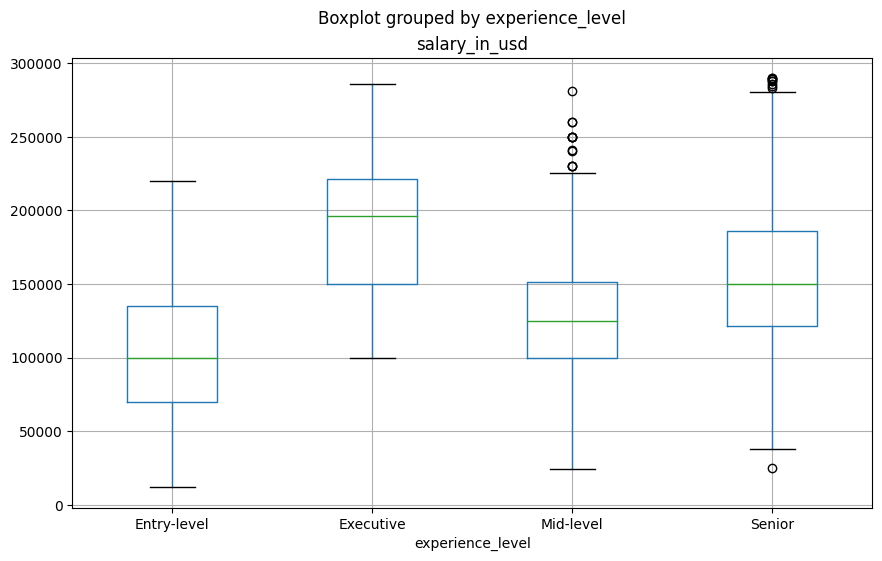

In [ ]:
import matplotlib.pyplot as plt
salary_final.boxplot(column='salary_in_usd', by='experience_level', figsize=(10,6))
plt.show()

#2. Data Objects & Attribute Types

To get started, we created a function that prints the data attributes as a list for a clean and nice appearance.

In [ ]:
def Data_print_as_List(input_data):
  for i, col in enumerate(input_data):
    print(i,col)

### **Identify and print nominal attributes**


Because nominal attributes are typically the most common in our final dataframe, we should apply exclusion methods.

In [ ]:
# Print norminal attributes
print("List of Nominal Atributes:\n")
Nominal_col = df_salary.loc[:, ~df_salary.columns.isin(['salary_in_usd', 'company_size', 'experience_level'])] # exclusing other columns
Data_print_as_List(Nominal_col)

List of Nominal Atributes:

0 work_year
1 employment_type
2 job_title
3 remote_ratio


###  **Identify and print binary attributes**

A binary attribute can only have two possible values (0 or 1, true or false, on or off...). To define binary attributes, we can manually examine the data frame or use code to list the columns automatically. In our instance, we chose code to ensure the most accurate outcome.

In [ ]:
# List binary attribute columns which has values as (0,1) or (True,False)
Binary_col = df_salary.columns[df_salary.isin([0, 1]).all()]

# Print the result
if not Binary_col.empty:
    print("List of Binary Atributes:\n")
    Data_print_as_List(Binary_col)
else:
    print("There are no binary columns in the data frame.")

There are no binary columns in the data frame.


***In this data set we don't have any columns have binary attribute***

### **Identify and print ordinal attributes**

We observed that the "experience_level" column may be an ordinal attribute because it indicates the range of experience levels.

Additionally, the "company_size" column may be an ordinal attribute since it reflects the company's size (small, medium, or large).

In [ ]:
# Get ordinal attributes
print("List of Ordinal Atributes:\n")
Ordinal_col = df_salary[['experience_level','company_size']]
Data_print_as_List(Ordinal_col)

List of Ordinal Atributes:

0 experience_level
1 company_size


Because the values of these two columns are of the string type, they will be returned in alphabetical order, preventing us from sorting them in the right manner.

So now we need to adjust the order for the values of those columns.

In [ ]:
# Set order for "experience_level" values, assending == True
ordinal_order = ['Entry-level','Mid-level','Senior','Executive']

# Print the order and its type
df_salary['experience_level'] = df_salary['experience_level'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))
df_salary.experience_level.dtype

CategoricalDtype(categories=['Entry-level', 'Mid-level', 'Senior', 'Executive'], ordered=True)

In [ ]:
# Set order for "company_size" values, assending == True
ordinal_order = ['Small','Medium','Large']

# Print the order & its type
df_salary['company_size'] = df_salary['company_size'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))
df_salary.experience_level.dtype

CategoricalDtype(categories=['Entry-level', 'Mid-level', 'Senior', 'Executive'], ordered=True)

###  **Identify and print numerical attributes**

The "salary_in_usd" has an int64 type and could be calculated, hence it must be a numerical attribute.


In [ ]:
# Print the numberical attributes
print("Numerical Atribute:\n")
Numerical_columns = df_salary[['salary_in_usd']]
Data_print_as_List(Numerical_columns)


Numerical Atribute:

0 salary_in_usd


In [ ]:
Numerical_columns.describe()

,salary_in_usd
count,2909.000000
mean,152500.606050
std,54658.328851
min,12000.000000
25%,115000.000000
50%,145000.000000
75%,185000.000000
max,405000.000000


#3. Statistics & Visualization

**Assessment:**
- Mean and Median (0.5 points): Correctly calculates the mean and median values for appropriate columns.
- Standard Deviation and Variance (0.5 points): Accurately computes the standard deviation and variance of data.
- Minimum and Maximum (0.25 points): Finds the minimum and maximum values.
- Sum and Product (0.25 points): Accurately calculates the sum and product of data.

In [ ]:
# Check DataFrame columns
print(df_salary.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'remote_ratio', 'company_size'],
      dtype='object')


In [ ]:

# Calculate basic statistics
actual_mean_salary = np.mean(df_salary['salary_in_usd'])
actual_median_salary = np.median(df_salary['salary_in_usd'])
actual_std_dev_salary = np.std(df_salary['salary_in_usd'], ddof=1)
actual_variance_salary = np.var(df_salary['salary_in_usd'], ddof=1)
actual_min_salary = np.min(df_salary['salary_in_usd'])
actual_max_salary = np.max(df_salary['salary_in_usd'])
actual_total_salary = np.sum(df_salary['salary_in_usd'])

# Now, print out the actual statistics with explanations
actual_stats_explanations = {
    "Mean Salary \t\t": (actual_mean_salary, "\t\t Average salary across all entries."),
    "Median Salary \t\t": (actual_median_salary, "\t\t Middle salary value, robust against outliers."),
    "Standard Deviation \t": (actual_std_dev_salary, "\t\t Variability of salary distribution."),
    "Variance \t\t": (actual_variance_salary, "\t Measure of salary distribution spread."),
    "Minimum Salary \t\t": (actual_min_salary, "\t\t Lowest salary in the dataset."),
    "Maximum Salary \t\t": (actual_max_salary, "\t\t Highest salary in the dataset."),
    "Total Salary \t\t": (actual_total_salary, "\t Sum of all salaries, useful for budgeting.")
}

# Print each statistic with its explanation
for stat, (value, explanation) in actual_stats_explanations.items():
    print(f"{stat}: {value:.2f} - {explanation}")



Mean Salary 		: 152500.61 - 		 Average salary across all entries.
Median Salary 		: 145000.00 - 		 Middle salary value, robust against outliers.
Standard Deviation 	: 54658.33 - 		 Variability of salary distribution.
Variance 		: 2987532912.83 - 	 Measure of salary distribution spread.
Minimum Salary 		: 12000.00 - 		 Lowest salary in the dataset.
Maximum Salary 		: 405000.00 - 		 Highest salary in the dataset.
Total Salary 		: 443624263.00 - 	 Sum of all salaries, useful for budgeting.


- **Mean Salary: 69146.21 USD** - This is the average salary across all entries in your dataset. It gives a general idea of what a person in the data science field might expect to earn.
- **Median Salary: 68721.35 USD** - This is the middle salary value when all salaries are lined up from lowest to highest. It is robust against outliers, meaning it's a good indicator of the 'typical' salary even if there are extreme values in the dataset.
- **Standard Deviation: 15505.10** - This value represents the variability or spread of the salary distribution. A higher standard deviation means a wider spread of salary figures around the mean.
- **Variance: 240408220.24** - Variance is another measure of spread in the data. It's the average of the squared differences from the mean. A high variance means that individual salaries are far from the mean, and a low variance means they are close to the mean.
- **Minimum Salary: 24923.08 USD** - This is the lowest salary recorded in your dataset, which could be representative of entry-level positions or internships.
- **Maximum Salary: 107466.51 USD** - This is the highest salary in the dataset, which might correspond to senior or highly specialized roles within the data science field.
- **Total Salary: 6914621.17 USD** - This is the sum of all salaries within the dataset, which can be useful for budgeting or economic impact analyses at a larger scale.



### 1.Top 10 Jobs with the Highest Salary for Senior in 2023

**Approach**:
Filter the dataset for entries where `experience_level` is 'Senior' and `work_year` is '2023'. Then sort these entries by `salary_in_usd` and get the top 10.

**Visualization**:
Create a bar chart showing the job titles on the x-axis and the average salaries on the y-axis.


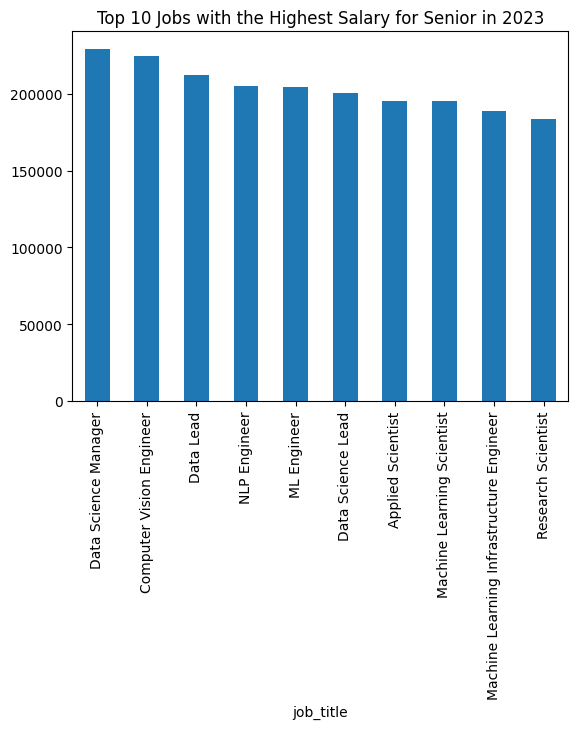

In [ ]:
senior_2023 = df_salary[(df_salary['experience_level'] == 'Senior') & (df_salary['work_year'] == 2023)]
top10_senior_jobs = senior_2023.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
plt.title('Top 10 Jobs with the Highest Salary for Senior in 2023')
top10_senior_jobs.plot(kind='bar')
plt.show()


### 2.Mean Salary of Each Job Title in Small-Sized Companies in the US

**Approach**:
Filter for 'small-sized' companies and group by `job_title` to calculate the mean `salary_in_usd`.

**Visualization**:
A bar chart with job titles and their corresponding mean salaries would be effective.


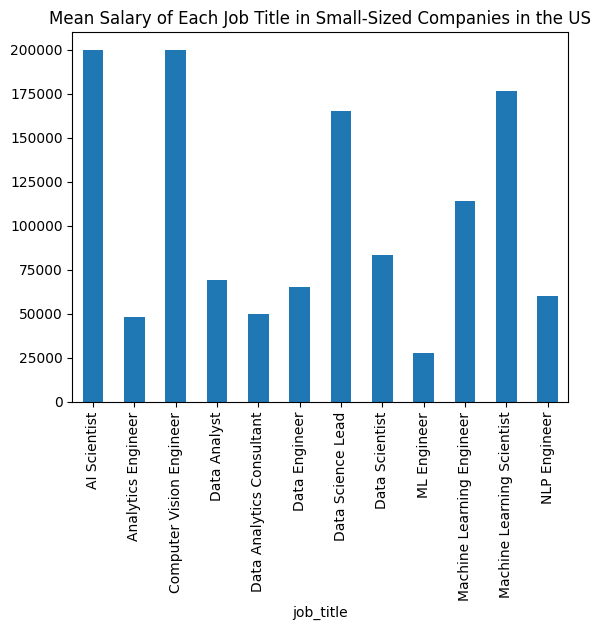

In [ ]:
# 2.1 Visualize by bar chart
small_companies = df_salary[(df_salary['company_size'] == 'Small')]
mean_salary_by_title = small_companies.groupby('job_title')['salary_in_usd'].mean()
plt.title('Mean Salary of Each Job Title in Small-Sized Companies in the US')
mean_salary_by_title.plot(kind='bar')
plt.show()

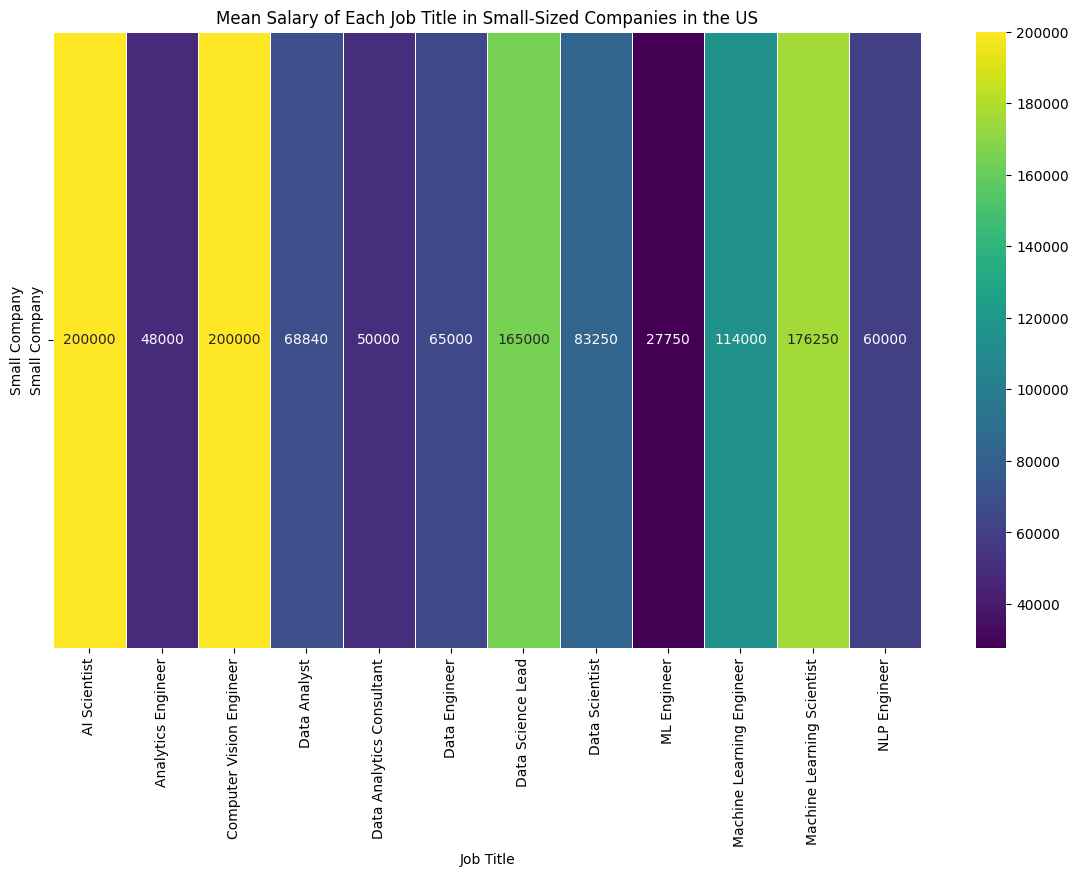

In [ ]:
# 2.2 Visualize by Heat map chart
# Filter the DataFrame for small-sized companies
small_companies = df_salary[df_salary['company_size'] == 'Small']

# Calculate the mean salary for each job title
mean_salaries_by_title = small_companies.groupby('job_title')['salary_in_usd'].mean()

# Create a DataFrame suitable for a heatmap with a dummy axis for 'Small Company'
heatmap_data = pd.DataFrame({
    'Job Title': mean_salaries_by_title.index,
    'Small Company': 'Small Company',
    'Mean Salary': mean_salaries_by_title.values
})

# Create a pivot table for the heatmap with the dummy axis for 'Small Company'
heatmap_pivot = heatmap_data.pivot("Small Company", "Job Title", "Mean Salary")

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".0f", cmap='viridis', linewidths=.5)
plt.title('Mean Salary of Each Job Title in Small-Sized Companies in the US')
plt.show()


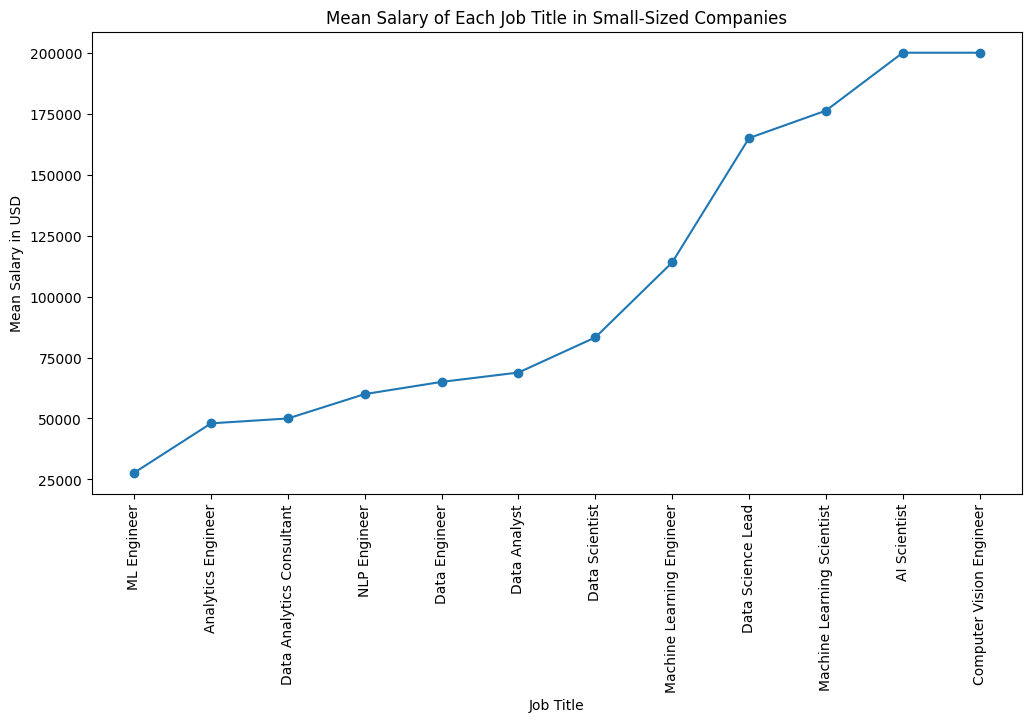

In [ ]:
# 2.3 Visualize by Line plot chart
small_companies = df_salary[df_salary['company_size'] == 'Small']
mean_salaries_by_title = small_companies.groupby('job_title')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(12, 6))
plt.plot(mean_salaries_by_title.index, mean_salaries_by_title.values, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Mean Salary in USD')
plt.title('Mean Salary of Each Job Title in Small-Sized Companies')
plt.show()


### 3.Average Income for the Data Scientist Job by Experience Level

**Approach**:
Filter for 'Data Scientist' positions and group by `experience_level` to calculate the mean `salary_in_usd`.

**Visualization**:
Use a bar chart to show the different experience levels on the x-axis and the average salaries on the y-axis.




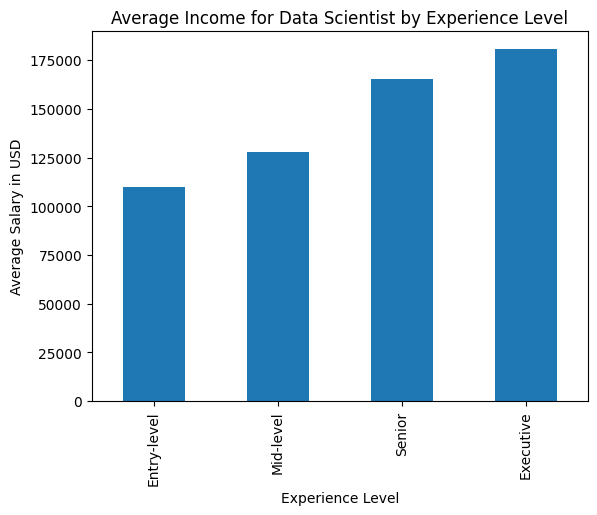

In [ ]:
# 3.1 Visualize by Bar chart
# Filter for 'Data Scientist' positions
data_scientist_salaries = df_salary[df_salary['job_title'] == 'Data Scientist']

# Group by experience level and calculate the mean salary
income_by_experience = data_scientist_salaries.groupby('experience_level')['salary_in_usd'].mean()

# Plot the result by using bar chart
income_by_experience.plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.title('Average Income for Data Scientist by Experience Level')
plt.show()


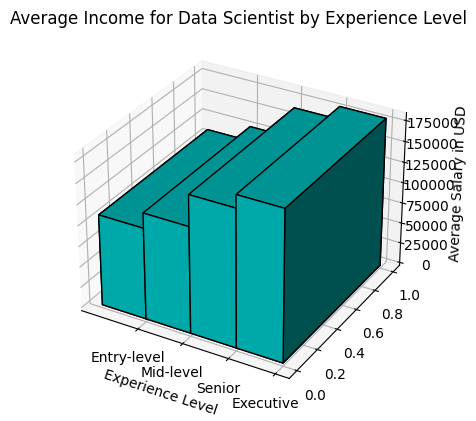

In [ ]:
# 3.2 Visualize by 3D chart
# Visualize the same result as above with 3D chart

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(len(income_by_experience.index))
y = np.zeros(len(income_by_experience.index))
z = np.zeros(len(income_by_experience.index))
dx = np.ones(len(income_by_experience.index))
dy = np.ones(len(income_by_experience.index))
dz = income_by_experience.values
ax.bar3d(x, y, z, dx, dy, dz, color='c', edgecolor='black')
ax.set_xticks(x + 1)
ax.set_xticklabels(income_by_experience.index)
ax.set_xlabel('Experience Level')
ax.set_ylabel('')
ax.set_zlabel('Average Salary in USD')
ax.set_title('Average Income for Data Scientist by Experience Level')
plt.show()

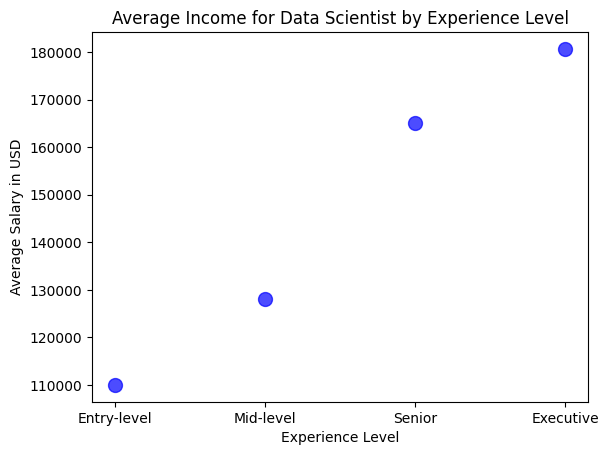

In [ ]:
# 3.3 Visualize by Scatter chart

data_scientist_salaries = df_salary[df_salary['job_title'] == 'Data Scientist']
income_by_experience = data_scientist_salaries.groupby('experience_level')['salary_in_usd'].mean()

# Create scatter plot
plt.scatter(income_by_experience.index, income_by_experience.values, s=100, color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.title('Average Income for Data Scientist by Experience Level')

# Show the plot
plt.show()

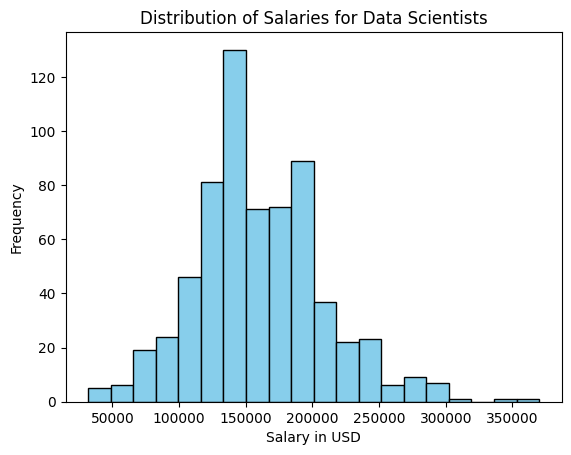

In [ ]:
# 3.4 Visualize by Histogram chart

data_scientist_salaries = df_salary[df_salary['job_title'] == 'Data Scientist']
income_by_experience = data_scientist_salaries.groupby('experience_level')['salary_in_usd'].mean()

# Create histogram
plt.hist(data_scientist_salaries['salary_in_usd'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries for Data Scientists')

# Show the plot
plt.show()

### 4.Top 5 Popular Job Titles from 2022 to 2023

**Approach**:
Filter the dataset for the years 2022 and 2023, then count the frequency of each `job_title`.

**Visualization**:
A bar chart showing the job titles and their counts would work well here.

These pseudocode examples assume your DataFrame has columns named `experience_level`, `work_year`, `company_size`, `job_title`, and `salary_in_usd`. You will need to adjust the column names and filter criteria according to your actual dataset. Once you have your data ready, replace the placeholders with your DataFrame's actual column names and execute these snippets to perform the analysis and create the visualizations.

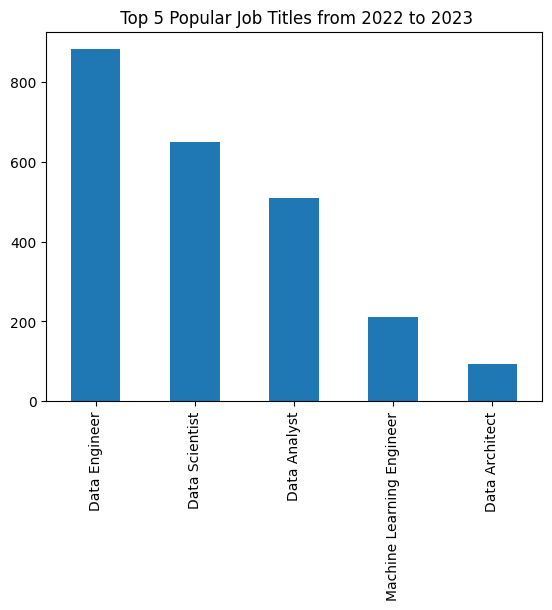

In [ ]:
# Visualization with the bar chart
recent_years = df_salary[df_salary['work_year'].isin([2022, 2023])]
popular_job_titles = recent_years['job_title'].value_counts().nlargest(5)
popular_job_titles.plot(kind='bar')
plt.title(' Top 5 Popular Job Titles from 2022 to 2023')
plt.show()

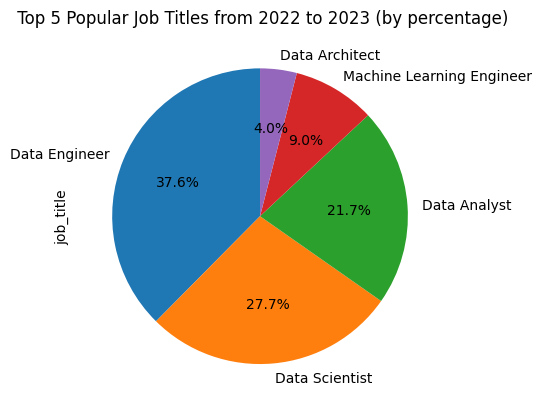

In [ ]:
# Pie Chart for question "What are the top 5 poppular job titles from 2022 to 2023? "

recent_years = df_salary[df_salary['work_year'].isin([2022, 2023])]
popular_job_titles = recent_years['job_title'].value_counts().nlargest(5)

popular_job_titles.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title(' Top 5 Popular Job Titles from 2022 to 2023 (by percentage)')
plt.show()



#### Top 5 popular job titles in 2022, 2023 (Optional) from Mr. Hiep

In [ ]:
#show the highest salary in each job_title item.
df_3 = df_salary[["work_year","experience_level","job_title","salary_in_usd","company_size"]]
df_4 = df_3.groupby("job_title")["salary_in_usd"].idxmax()
Job_title_index = df_3.loc[df_4]
Job_title_index[["work_year","job_title","salary_in_usd"]]
new_order_col = ["job_title","salary_in_usd","work_year"]
abc = Job_title_index.reindex(columns = new_order_col)

#create the dataframe that show relationship between job_title and their quantity.
job_count = df_salary['job_title'].value_counts()
df10 = job_count.index
df20 = job_count.values
df_job_title = pd.DataFrame({"job_title": df10, "job_title_count": df20})

 # merge two df to create a new df
df_new = pd.merge(abc,df_job_title, on='job_title')
df_new.set_index("work_year", inplace=True)
df_new.sort_values("job_title_count",ascending = False).head(5)

,job_title,salary_in_usd,job_title_count
work_year,,,
2022,Data Engineer,324000,882
2023,Data Scientist,370000,650
2023,Data Analyst,385000,509
2023,Machine Learning Engineer,342300,212
2023,Data Architect,376080,94


**Activities:**
You will utilize Matplotlib to create a diverse range of plots and charts. Depending on the dataset and your analysis, you may generate the following visuals as needed:
- Line Plot
- Scatter Plot
- Bar Chart
- Histrogram
- Piechart
- Heatmap
- 3D Plot

**Assessment:**
Creates both a line plot and a scatter plot with appropriate labels and titles.
- Bar Chart and Histogram (0.5 points): Successfully generates a bar chart and a histogram.
- Pie Chart and Heatmap (0.25 points): Produces a pie chart and a heatmap.
- 3D Plot (0.25 points): Creates a 3D plot if applicable to the dataset.

# TBC: Necessity codes for our analytics (by Mr. Hiep)

### Code for filtering the data_frame by input col_name and row_name

In [ ]:
def check(col,row):
    i = 0
    while i < len(df_salary.index):
        for experience_name in df_salary.nunique():
            df_name = df_salary[df_salary[col]== row]

        i +=1
    return df_name
df_1 = check("job_title","Data Engineer")
df_1.shape


(882, 7)

### Create a new frame to compare salary between job_title:

In [ ]:
#show the highest salary in each job_title item.
df_3 = df_salary[["work_year","experience_level","job_title","salary_in_usd","company_size"]]
df_4 = df_3.groupby("job_title")["salary_in_usd"].idxmax()
Job_title_index = df_3.loc[df_4]
Job_title_index.sort_values("salary_in_usd",ascending=False)

,work_year,experience_level,job_title,salary_in_usd,company_size
3463,2022,Senior,Data Analytics Lead,405000,Large
1288,2023,Senior,Data Analyst,385000,Medium
3468,2022,Senior,Applied Data Scientist,380000,Large
649,2023,Senior,Data Architect,376080,Medium
1258,2022,Senior,Machine Learning Software Engineer,375000,Medium
...,...,...,...,...,...
832,2023,Senior,Data Analytics Specialist,105000,Medium
230,2023,Senior,Data Quality Analyst,100000,Medium
391,2023,Mid-level,Lead Data Analyst,68000,Large
392,2023,Entry-level,BI Data Engineer,60000,Medium
